# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market
The company is looking at prospective properties to buy to enter the market.


# Goals
- Build a regression model using regularization predict the actual value of the prospective properties and decide whether to invest in them.
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house
- Determine the optimal value of lambda for ridge and lasso regression

## Imports

In [90]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("once")

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Set Pandas options for better display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

## Read dataset & analysis

In [93]:
data = pd.read_csv("train.csv")

In [94]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [95]:
data.shape

(1460, 81)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [97]:
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

### Null Value check & cleanup

In [8]:
((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

### Drop vars for nulls higher than 30%

In [9]:
data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace=True)

In [10]:
((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)

LotFrontage      17.739726
GarageFinish      5.547945
GarageType        5.547945
GarageCond        5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
MasVnrArea        0.547945
Electrical        0.068493
RoofStyle         0.000000
RoofMatl          0.000000
SalePrice         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
BldgType          0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
Condition2        0.000000
Condition1        0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
Utilities         0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
L

#### Imputing LotFrontage 

In [11]:
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
data.LotFrontage.mean(), data.LotFrontage.median()

(70.04995836802665, 69.0)

In [13]:
data.LotFrontage.fillna(data.LotFrontage.mean(), inplace=True)

#### Fixing Garage related variables

In [14]:
data.GarageFinish.fillna("Unknown", inplace=True)
data.GarageType.fillna("Unknown", inplace=True)
data.GarageCond.fillna("Unknown", inplace=True)
data.GarageQual.fillna("Unknown", inplace=True)

In [15]:
data.GarageYrBlt.min(), data.GarageYrBlt.max()

(1900.0, 2010.0)

In [16]:
data['GarageYrBltAge'] = 2010-data['GarageYrBlt']

In [17]:
data.GarageYrBltAge.describe()

count    1379.000000
mean       31.493836
std        24.689725
min         0.000000
25%         8.000000
50%        30.000000
75%        49.000000
max       110.000000
Name: GarageYrBltAge, dtype: float64

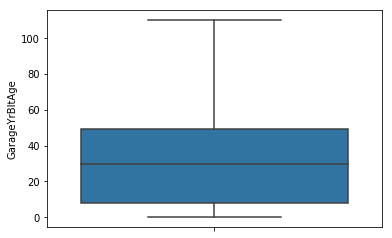

In [18]:
sns.boxplot(y=data.GarageYrBltAge)
plt.show()

- check trend for `Age of GarageYrBlt` and `Sale`

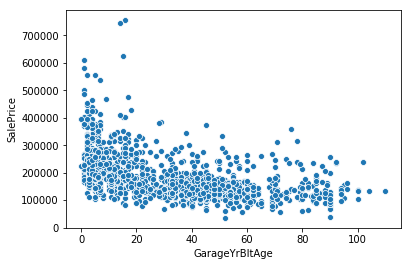

In [19]:
sns.scatterplot(y=data.SalePrice, x=data.GarageYrBltAge)
plt.show()

- Binning `Age of GarageYrBlt`

Doing this to handle NAs in GarageYrBlt to make them `UNKNOW`

In [20]:
data.GarageYrBltAge.fillna(-1, inplace=True)
data.GarageYrBltAge=data.GarageYrBltAge.astype(int)

In [21]:
def abc(val):
    if val < 0:
        return 'UNKNOW'
    elif val <=25:
        return "NEW"
    elif val <= 50:
        return "OLD"
    else :
        return "VERY_OLD"
data['GarageYrBltAgeBinned']=data.GarageYrBltAge.apply(lambda x: abc(x))

In [22]:
data[['Id','GarageYrBltAgeBinned']].groupby('GarageYrBltAgeBinned').count()

,Id
GarageYrBltAgeBinned,
NEW,649
OLD,415
UNKNOW,81
VERY_OLD,315


In [23]:
data.GarageYrBltAgeBinned.isna().sum()

0

Dropping binned columns

In [24]:
data.drop(columns=['GarageYrBlt', 'GarageYrBltAge'], inplace=True)

- Fixing NAs related to Basement

In [25]:
data.BsmtFinType2.fillna("None", inplace=True)
data.BsmtExposure.fillna("None", inplace=True)
data.BsmtFinType1.fillna("None", inplace=True)
data.BsmtCond.fillna("None", inplace=True)
data.BsmtQual.fillna("None", inplace=True)

- Fixing NAs related to MasVnr

In [26]:
data.MasVnrType.fillna('None', inplace=True)
data.MasVnrArea.fillna(0, inplace=True)

- Fixing NAs for Electrical

In [27]:
data.Electrical.fillna(data.Electrical.mode()[0], inplace=True)

- Rechecking & Verify NAs in dataset

In [28]:
((data.isnull().sum() / len(data)) * 100).sort_values(ascending=False)

GarageYrBltAgeBinned    0.0
ExterCond               0.0
RoofStyle               0.0
RoofMatl                0.0
Exterior1st             0.0
Exterior2nd             0.0
MasVnrType              0.0
MasVnrArea              0.0
ExterQual               0.0
Foundation              0.0
SalePrice               0.0
BsmtQual                0.0
BsmtCond                0.0
BsmtExposure            0.0
BsmtFinType1            0.0
BsmtFinSF1              0.0
BsmtFinType2            0.0
BsmtFinSF2              0.0
YearRemodAdd            0.0
YearBuilt               0.0
OverallCond             0.0
OverallQual             0.0
MSSubClass              0.0
MSZoning                0.0
LotFrontage             0.0
LotArea                 0.0
Street                  0.0
LotShape                0.0
LandContour             0.0
Utilities               0.0
LotConfig               0.0
LandSlope               0.0
Neighborhood            0.0
Condition1              0.0
Condition2              0.0
BldgType            

## EDA

- Converting YearBuilt to Age of Property

In [29]:
data.YearBuilt.min(), data.YearBuilt.max()

(1872, 2010)

In [30]:
data['YearBuiltAge'] = 2010-data['YearBuilt']
data.YearBuiltAge=data.YearBuiltAge.astype(int)

checking trend of Age of Property and SalePrice

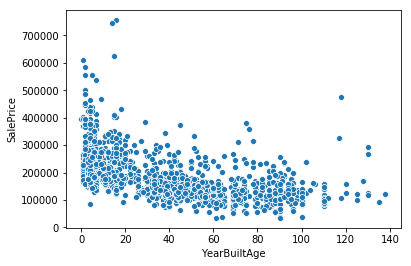

In [31]:
sns.scatterplot(y=data.SalePrice, x=data.YearBuiltAge)
plt.show()

- Converting YearRemodAdd to Age of Renovation

In [32]:
data.YearRemodAdd.min(), data.YearRemodAdd.max()

(1950, 2010)

In [33]:
data['YearRemodAddAge'] = 2010-data['YearRemodAdd']
data.YearRemodAddAge=data.YearRemodAddAge.astype(int)


checking trend of Age of Renovation and SalePrice

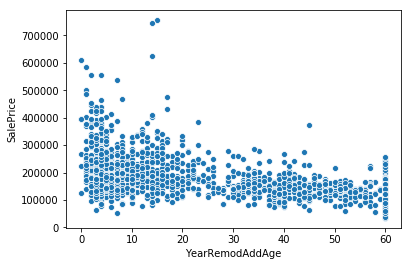

In [34]:
sns.scatterplot(y=data.SalePrice, x=data.YearRemodAddAge)
plt.show()

- Creating new variable `Difference between YearBuilt & YearSold` to see `how long it took for new property to get sold`

In [35]:
data['diffBuildSoldYr']=data.YrSold-data.YearBuilt

Checking trend between `time to Sold for new Property` vs `SalePrice` 

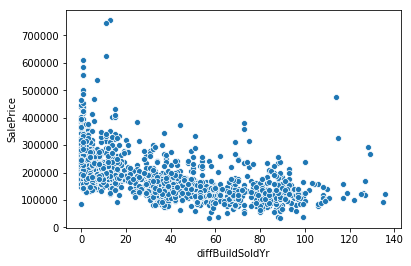

In [36]:
sns.scatterplot(y=data.SalePrice, x=data.diffBuildSoldYr)
plt.show()

Dropping year vars which are converted to age

In [37]:
data.drop(columns=['YrSold', 'YearRemodAdd', 'YearBuilt'], inplace=True)

- Converting `MSSubClassString` to Categorical Variable

In [38]:
data['MSSubClassString']=data.MSSubClass.astype(str)

In [39]:
data.drop(columns=['MSSubClass'], inplace=True)

- Adding some new features from Area

In [40]:
data['total_carpet_area'] = data.TotalBsmtSF + data.GrLivArea
data['LotAreaFrontageRatio'] = data.LotArea / data.LotFrontage

- Dropping Id column

In [41]:
data.drop(columns=['Id'], inplace=True)

- Creating list of categorical & continuous variables

In [42]:
num_vars = data.select_dtypes(include=[np.number])
cat_vars = data.select_dtypes(exclude=[np.number])

In [43]:
len(num_vars.columns), len(cat_vars.columns)

(37, 40)

- Plotting variables for see trends of like histograms, scatterplots, distplots, & countplots 

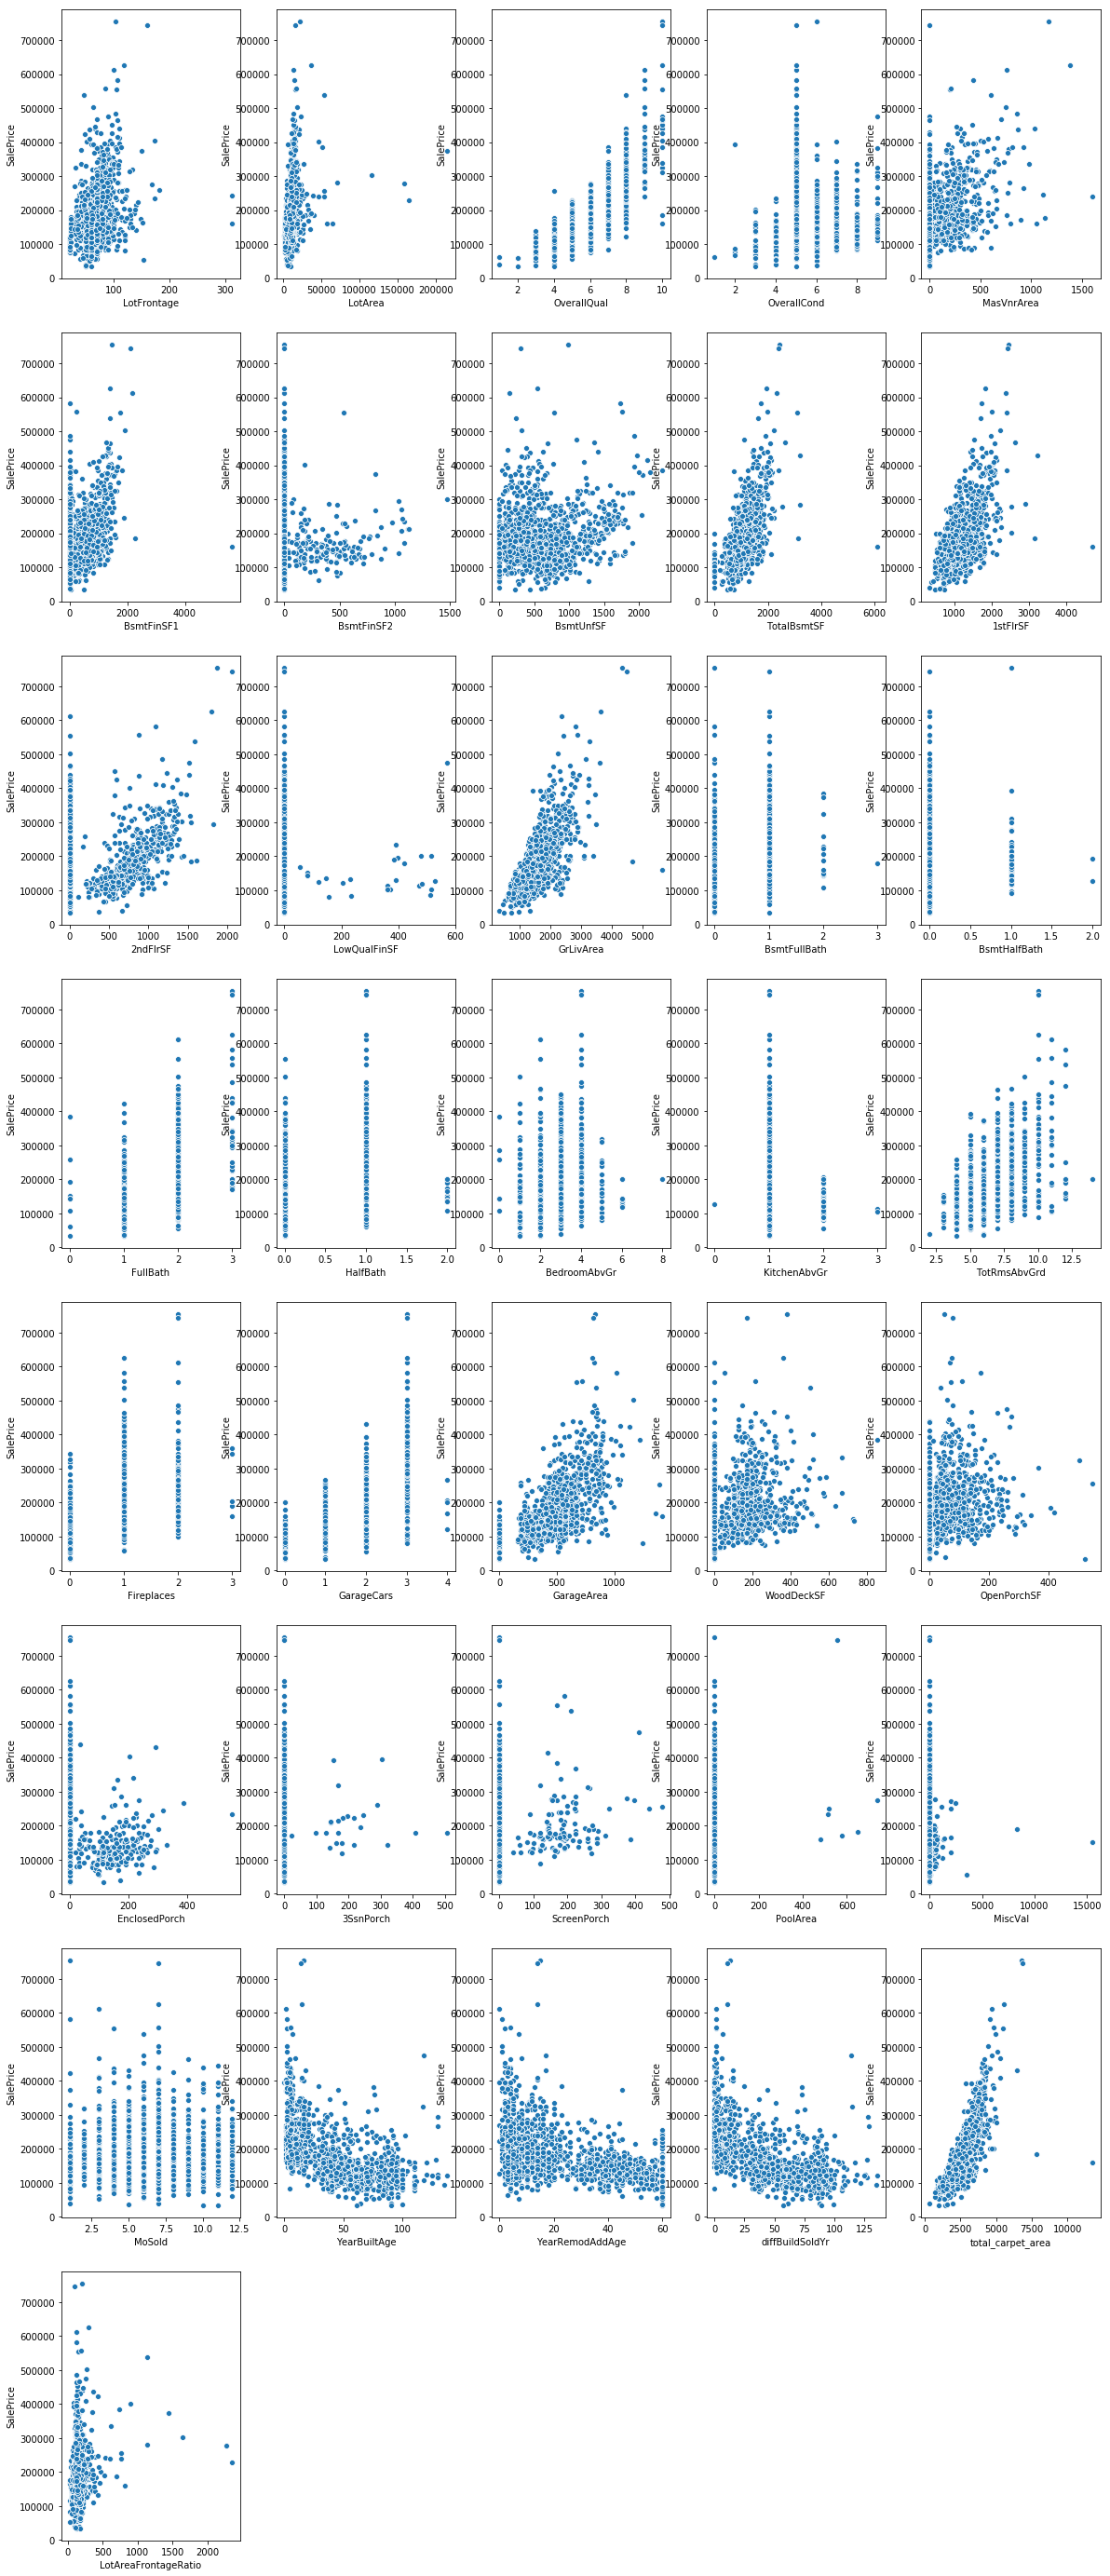

In [44]:
plt.figure(figsize=(20, 50))

cnt = 1
for col in num_vars.columns:
    if col != 'SalePrice':
        plt.subplot(8, 5, cnt)
        sns.scatterplot(y=num_vars.SalePrice, x=num_vars[col])
        cnt=cnt+1
    
plt.show()

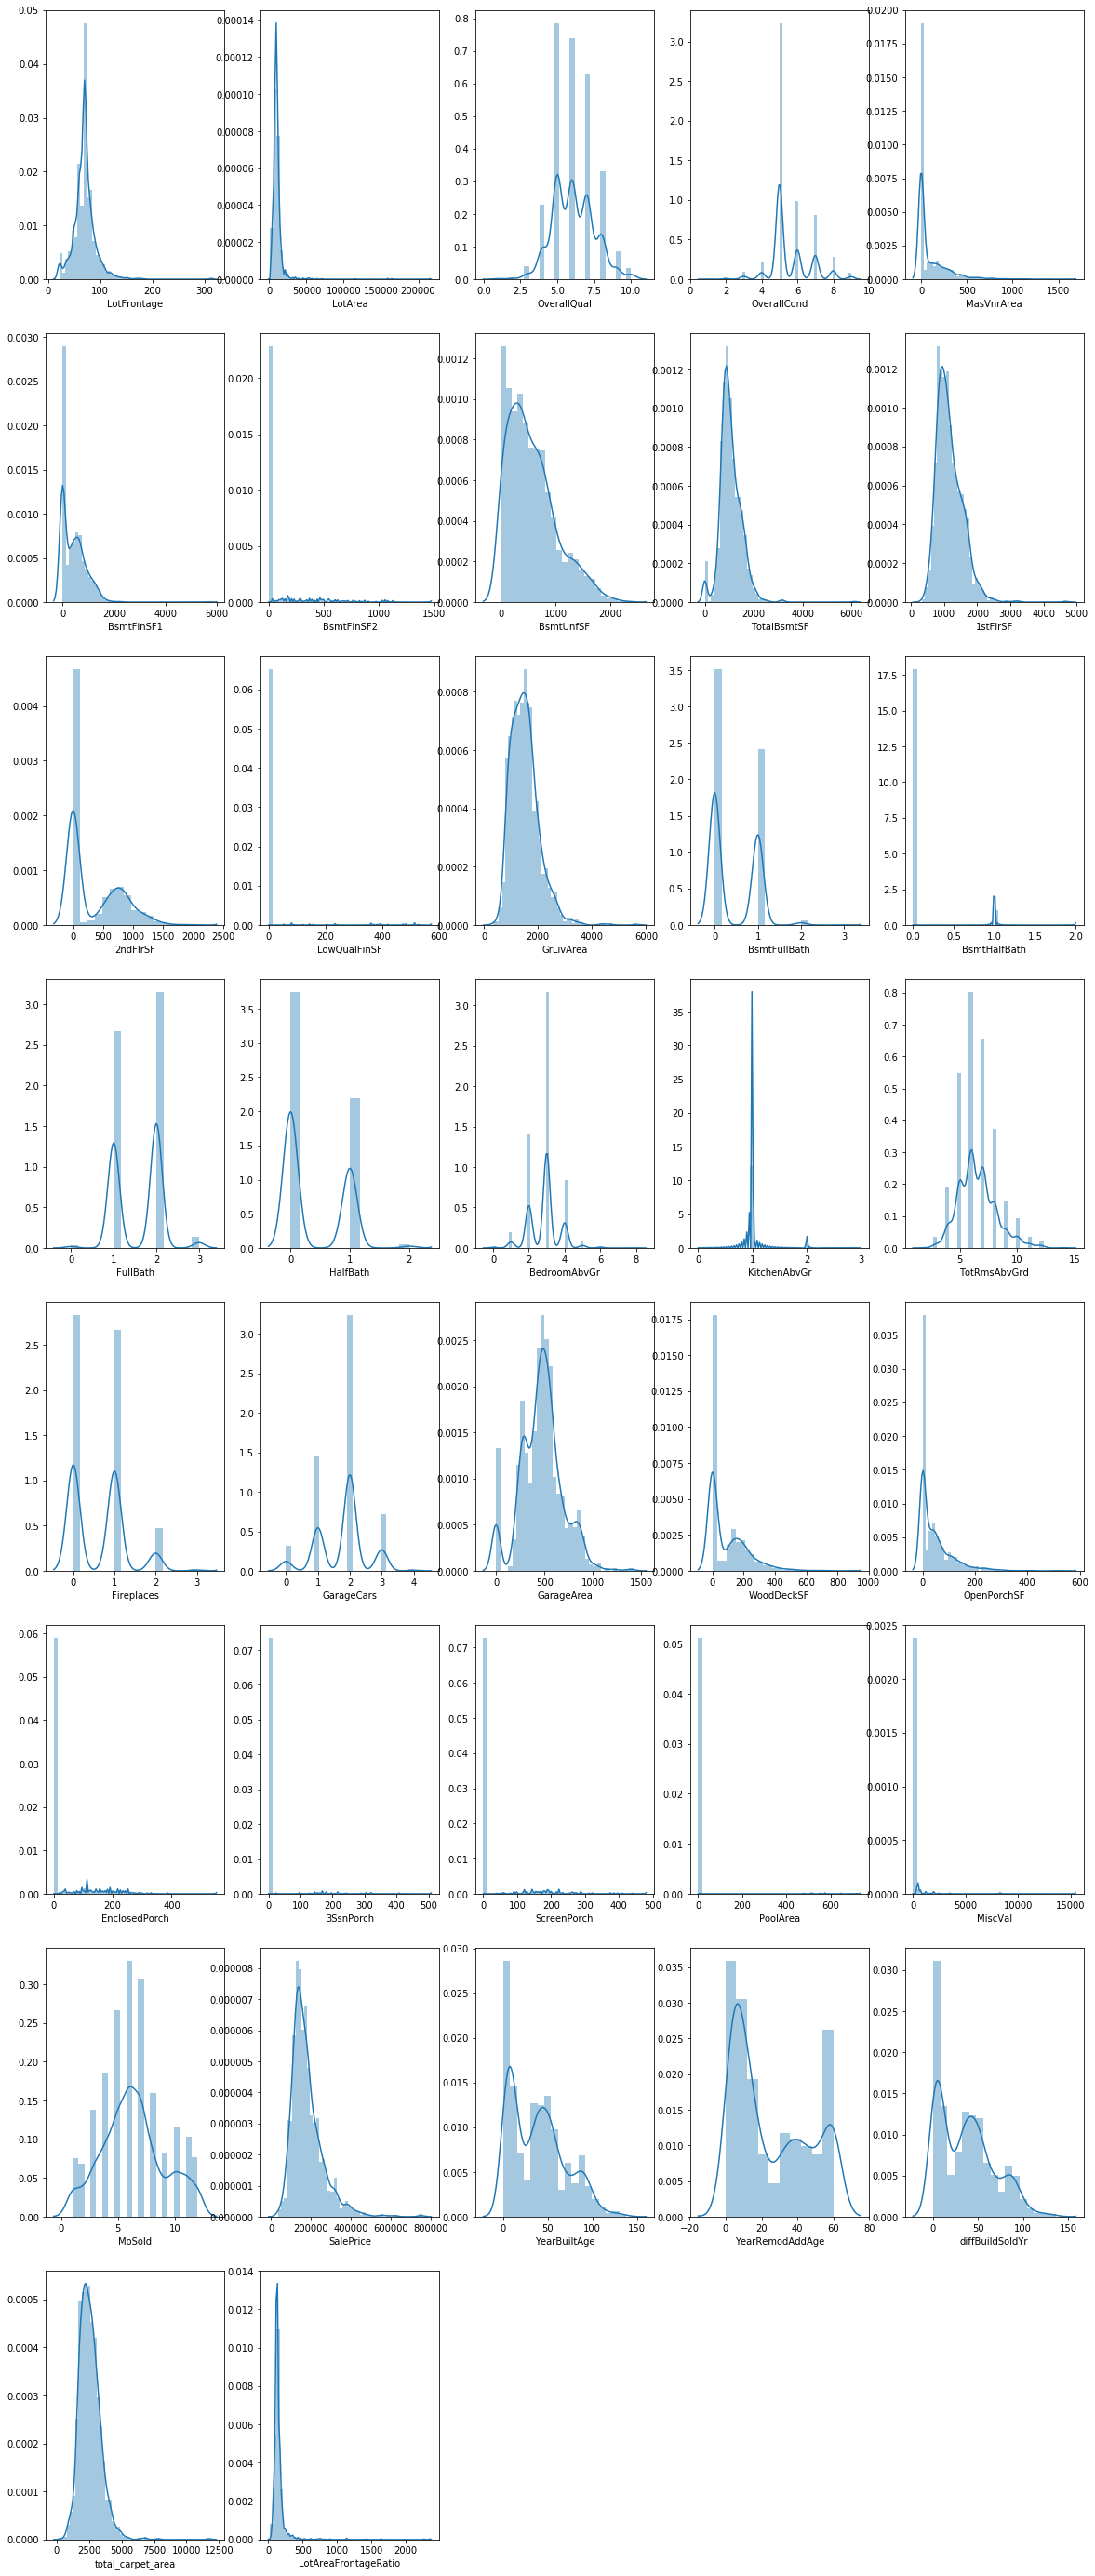

In [45]:
plt.figure(figsize=(20, 50))

cnt = 1
for col in num_vars.columns:
    plt.subplot(8, 5, cnt)
    sns.distplot(num_vars[col])
    cnt=cnt+1
    
plt.show()

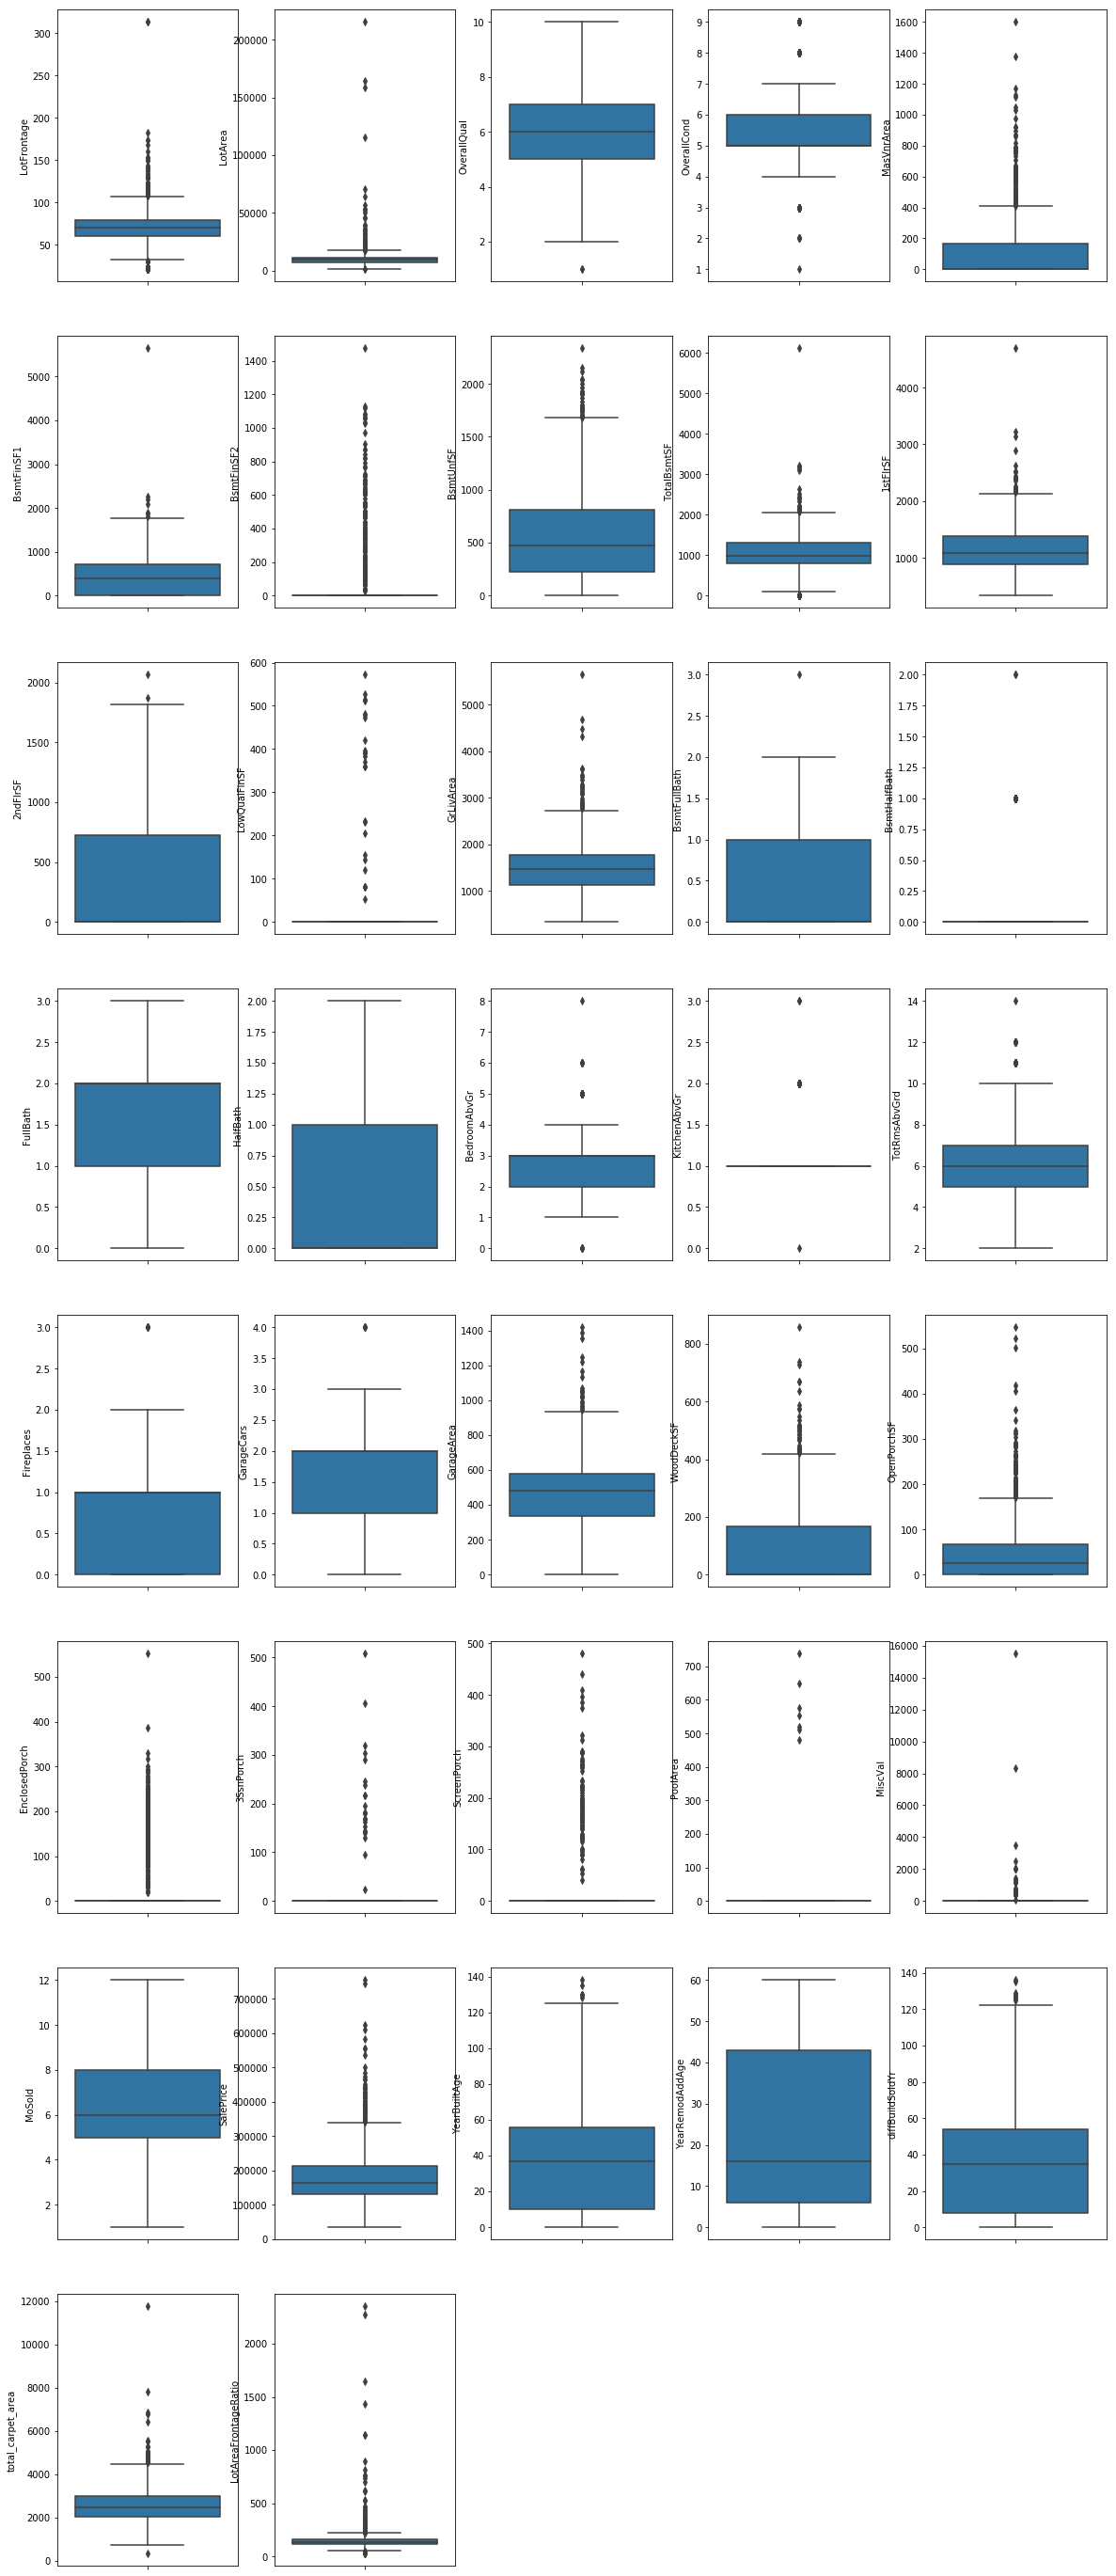

In [46]:
plt.figure(figsize=(20, 50))

cnt = 1
for col in num_vars.columns:
    plt.subplot(8, 5, cnt)
    sns.boxplot(y=num_vars[col])
    cnt=cnt+1
    
plt.show()

In [47]:
cat_vars.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,GarageYrBltAgeBinned,MSSubClassString
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,NEW,60
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,OLD,20
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,NEW,60
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,NEW,70
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,NEW,60


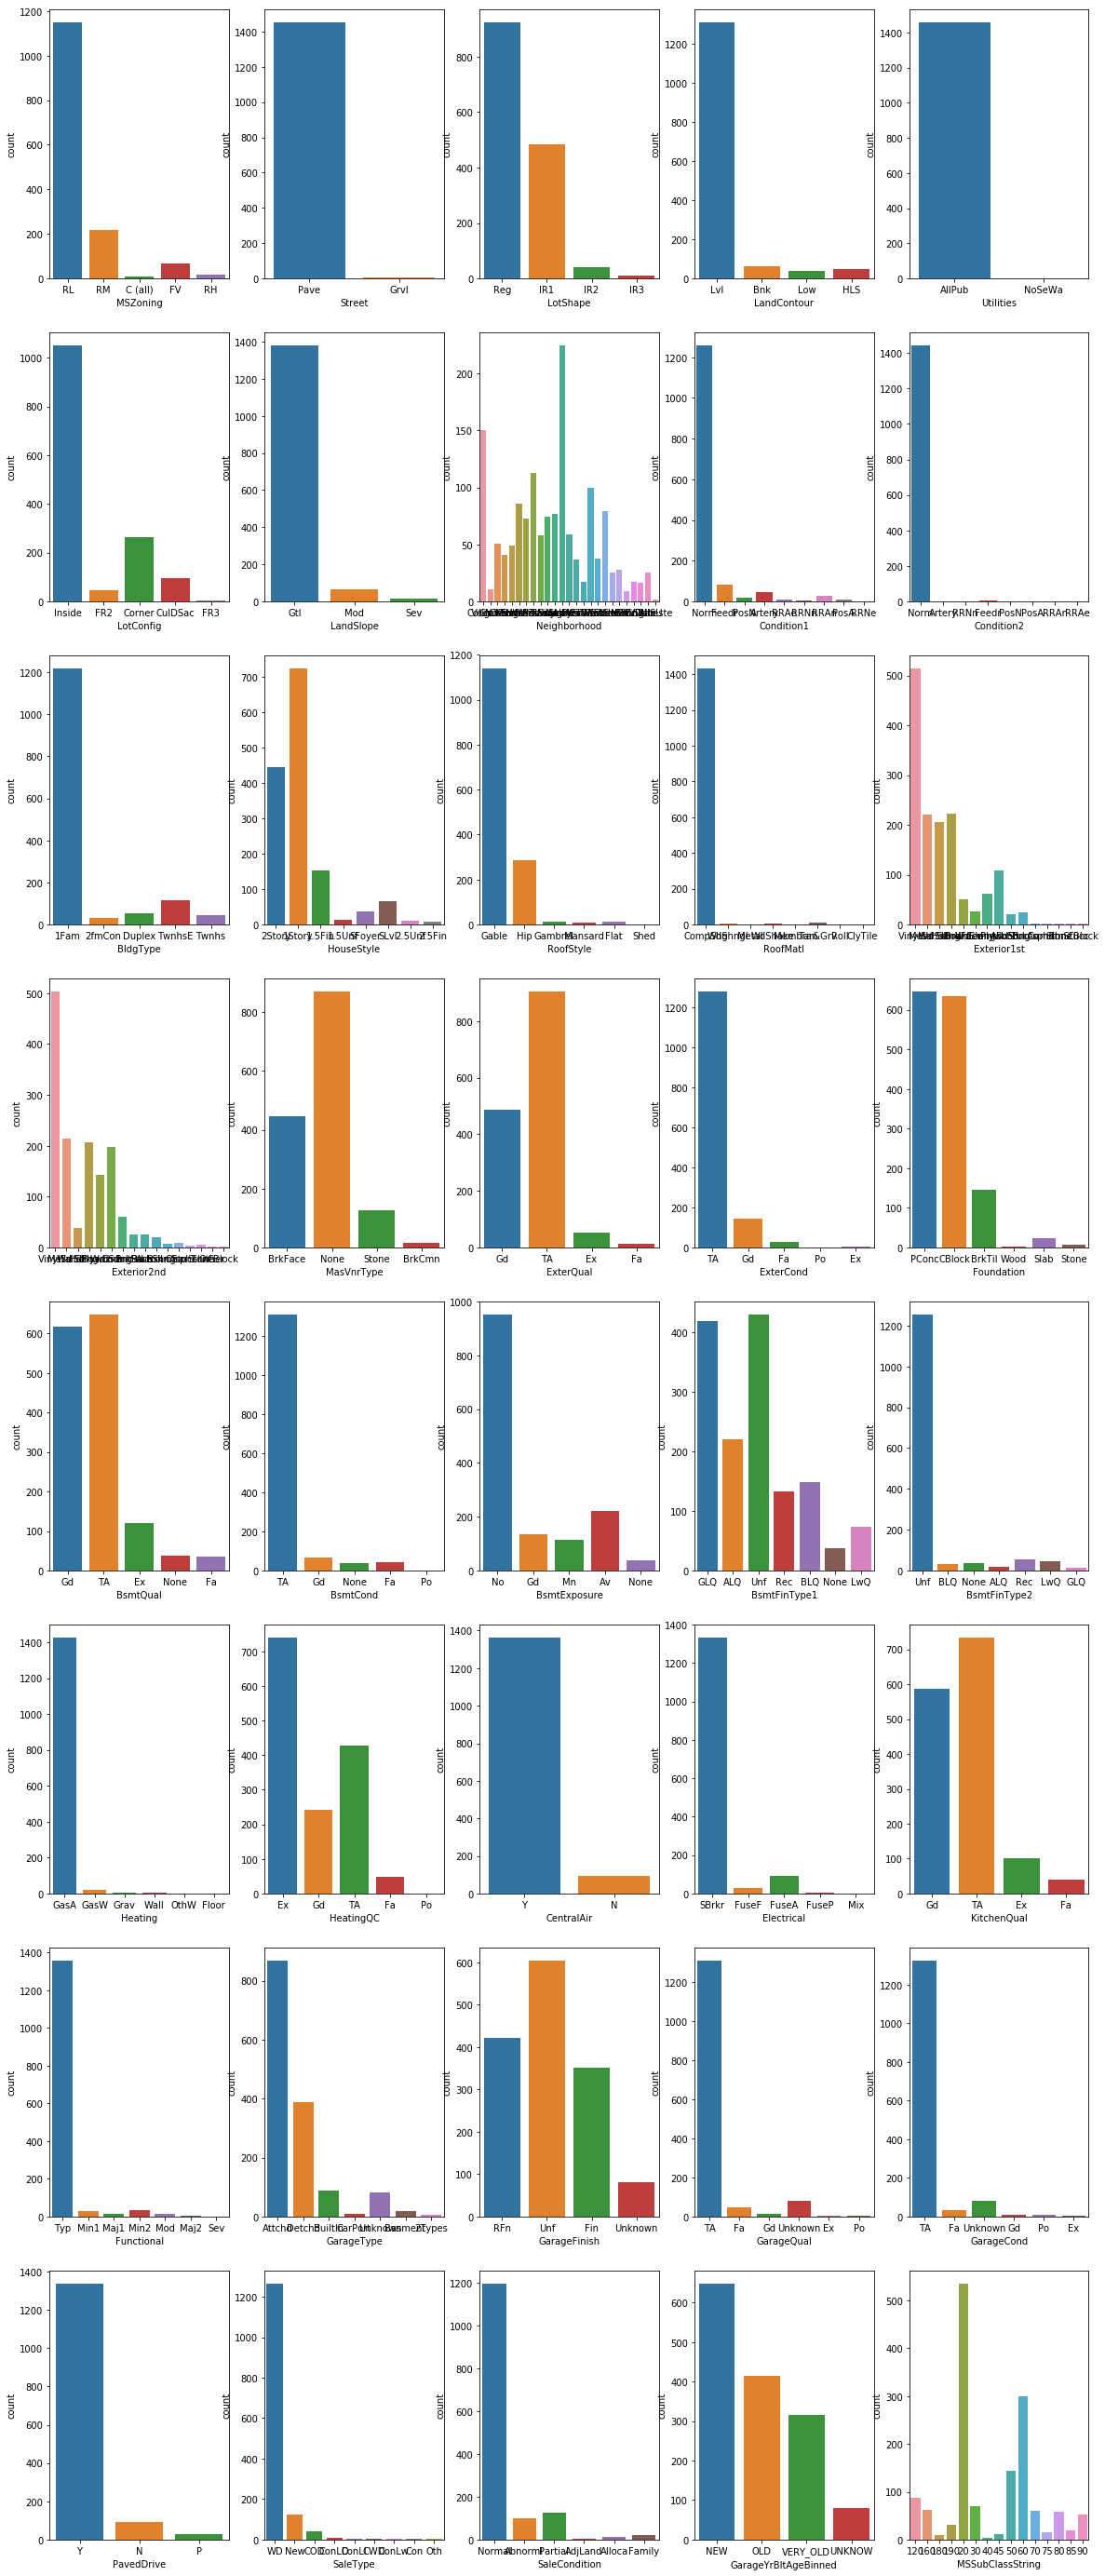

In [48]:
plt.figure(figsize=(20, 50))

cnt = 1
for var in cat_vars.columns:
    plt.subplot(8, 5, cnt)
    sns.countplot(cat_vars[var])
    cnt=cnt+1
    
plt.show()

- Check correlations & heatmap 

In [49]:
cor = num_vars.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,YearBuiltAge,YearRemodAddAge,diffBuildSoldYr,total_carpet_area,LotAreaFrontageRatio
LotFrontage,1.000000,0.306795,0.234196,-0.052820,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.334901,-0.117598,-0.082746,-0.117117,0.428594,-0.009060
LotArea,0.306795,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014228,-0.013788,-0.014832,0.306814,0.897140
OverallQual,0.234196,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572323,-0.550684,-0.572629,0.664830,0.040590
OverallCond,-0.052820,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.375983,-0.073741,0.377325,-0.141980,0.012559
MasVnrArea,0.178699,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.311600,-0.176529,-0.311479,0.439385,0.053298
BsmtFinSF1,0.215828,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.249503,-0.128451,-0.248483,0.411084,0.156570
BsmtFinSF2,0.043340,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.049107,0.067759,0.050422,0.049678,0.076065
BsmtUnfSF,0.122156,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479,-0.149040,-0.181133,-0.150619,0.374540,-0.036106
TotalBsmtSF,0.363358,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581,-0.391452,-0.291066,-0.391498,0.822888,0.154382
1stFlrSF,0.414266,0.299475,0.476224,-0.144203,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,0.605852,-0.281986,-0.240379,-0.282143,0.797678,0.190514


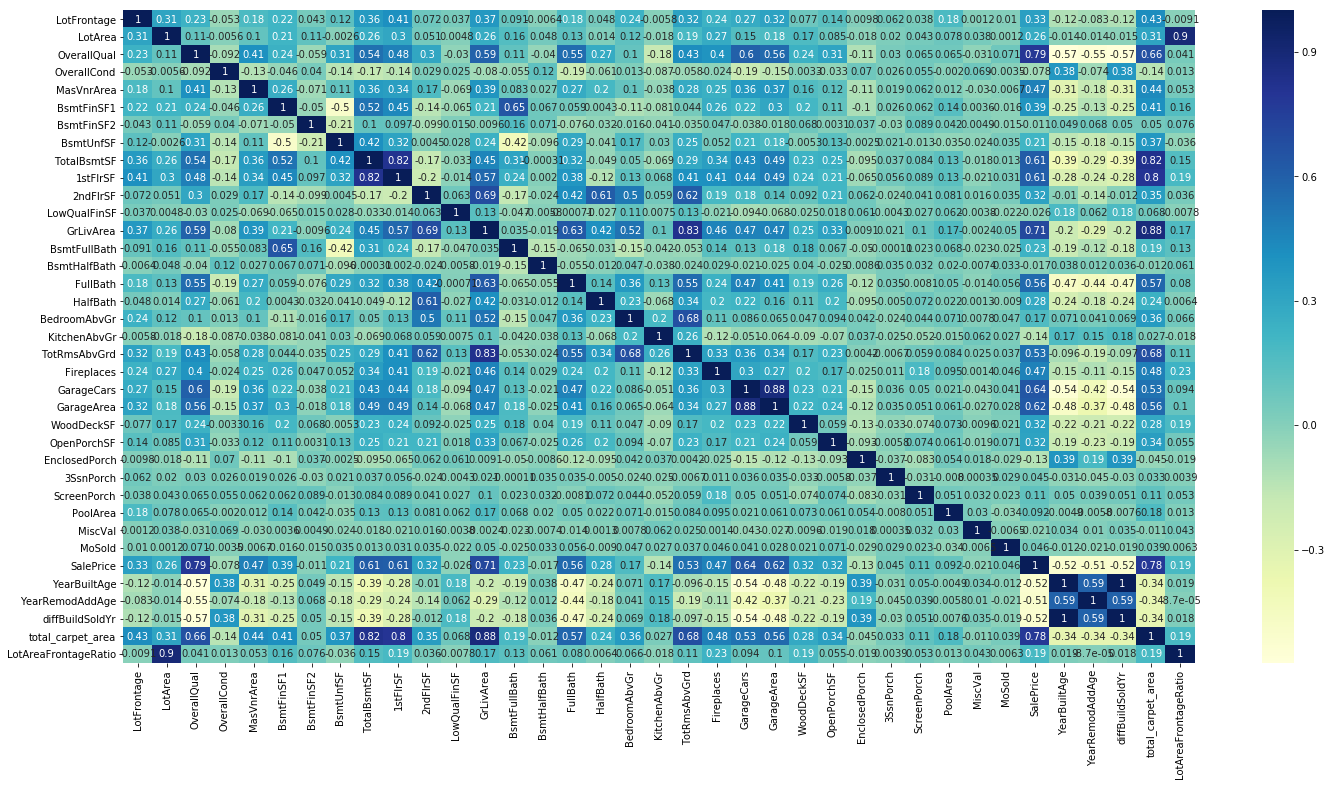

In [50]:

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,12))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


- Function to check count values of categorical variables

In [51]:
def custom_value_counts(data_series):
    return pd.DataFrame(data_series.value_counts(dropna=False))

In [52]:
for col in cat_vars.columns:
    print("Column : ",col)
    display(custom_value_counts(cat_vars[col]).T)
    print(100*"*")

Column :  MSZoning


,RL,RM,FV,RH,C (all)
MSZoning,1151,218,65,16,10


****************************************************************************************************
Column :  Street


,Pave,Grvl
Street,1454,6


****************************************************************************************************
Column :  LotShape


,Reg,IR1,IR2,IR3
LotShape,925,484,41,10


****************************************************************************************************
Column :  LandContour


,Lvl,Bnk,HLS,Low
LandContour,1311,63,50,36


****************************************************************************************************
Column :  Utilities


,AllPub,NoSeWa
Utilities,1459,1


****************************************************************************************************
Column :  LotConfig


,Inside,Corner,CulDSac,FR2,FR3
LotConfig,1052,263,94,47,4


****************************************************************************************************
Column :  LandSlope


,Gtl,Mod,Sev
LandSlope,1382,65,13


****************************************************************************************************
Column :  Neighborhood


,NAmes,CollgCr,OldTown,Edwards,Somerst,Gilbert,NridgHt,Sawyer,NWAmes,SawyerW,BrkSide,Crawfor,Mitchel,NoRidge,Timber,IDOTRR,ClearCr,StoneBr,SWISU,Blmngtn,MeadowV,BrDale,Veenker,NPkVill,Blueste
Neighborhood,225,150,113,100,86,79,77,74,73,59,58,51,49,41,38,37,28,25,25,17,17,16,11,9,2


****************************************************************************************************
Column :  Condition1


,Norm,Feedr,Artery,RRAn,PosN,RRAe,PosA,RRNn,RRNe
Condition1,1260,81,48,26,19,11,8,5,2


****************************************************************************************************
Column :  Condition2


,Norm,Feedr,RRNn,PosN,Artery,RRAn,PosA,RRAe
Condition2,1445,6,2,2,2,1,1,1


****************************************************************************************************
Column :  BldgType


,1Fam,TwnhsE,Duplex,Twnhs,2fmCon
BldgType,1220,114,52,43,31


****************************************************************************************************
Column :  HouseStyle


,1Story,2Story,1.5Fin,SLvl,SFoyer,1.5Unf,2.5Unf,2.5Fin
HouseStyle,726,445,154,65,37,14,11,8


****************************************************************************************************
Column :  RoofStyle


,Gable,Hip,Flat,Gambrel,Mansard,Shed
RoofStyle,1141,286,13,11,7,2


****************************************************************************************************
Column :  RoofMatl


,CompShg,Tar&Grv,WdShngl,WdShake,ClyTile,Membran,Metal,Roll
RoofMatl,1434,11,6,5,1,1,1,1


****************************************************************************************************
Column :  Exterior1st


,VinylSd,HdBoard,MetalSd,Wd Sdng,Plywood,CemntBd,BrkFace,WdShing,Stucco,AsbShng,BrkComm,Stone,AsphShn,ImStucc,CBlock
Exterior1st,515,222,220,206,108,61,50,26,25,20,2,2,1,1,1


****************************************************************************************************
Column :  Exterior2nd


,VinylSd,MetalSd,HdBoard,Wd Sdng,Plywood,CmentBd,Wd Shng,Stucco,BrkFace,AsbShng,ImStucc,Brk Cmn,Stone,AsphShn,CBlock,Other
Exterior2nd,504,214,207,197,142,60,38,26,25,20,10,7,5,3,1,1


****************************************************************************************************
Column :  MasVnrType


,None,BrkFace,Stone,BrkCmn
MasVnrType,872,445,128,15


****************************************************************************************************
Column :  ExterQual


,TA,Gd,Ex,Fa
ExterQual,906,488,52,14


****************************************************************************************************
Column :  ExterCond


,TA,Gd,Fa,Ex,Po
ExterCond,1282,146,28,3,1


****************************************************************************************************
Column :  Foundation


,PConc,CBlock,BrkTil,Slab,Stone,Wood
Foundation,647,634,146,24,6,3


****************************************************************************************************
Column :  BsmtQual


,TA,Gd,Ex,None,Fa
BsmtQual,649,618,121,37,35


****************************************************************************************************
Column :  BsmtCond


,TA,Gd,Fa,None,Po
BsmtCond,1311,65,45,37,2


****************************************************************************************************
Column :  BsmtExposure


,No,Av,Gd,Mn,None
BsmtExposure,953,221,134,114,38


****************************************************************************************************
Column :  BsmtFinType1


,Unf,GLQ,ALQ,BLQ,Rec,LwQ,None
BsmtFinType1,430,418,220,148,133,74,37


****************************************************************************************************
Column :  BsmtFinType2


,Unf,Rec,LwQ,None,BLQ,ALQ,GLQ
BsmtFinType2,1256,54,46,38,33,19,14


****************************************************************************************************
Column :  Heating


,GasA,GasW,Grav,Wall,OthW,Floor
Heating,1428,18,7,4,2,1


****************************************************************************************************
Column :  HeatingQC


,Ex,TA,Gd,Fa,Po
HeatingQC,741,428,241,49,1


****************************************************************************************************
Column :  CentralAir


,Y,N
CentralAir,1365,95


****************************************************************************************************
Column :  Electrical


,SBrkr,FuseA,FuseF,FuseP,Mix
Electrical,1335,94,27,3,1


****************************************************************************************************
Column :  KitchenQual


,TA,Gd,Ex,Fa
KitchenQual,735,586,100,39


****************************************************************************************************
Column :  Functional


,Typ,Min2,Min1,Mod,Maj1,Maj2,Sev
Functional,1360,34,31,15,14,5,1


****************************************************************************************************
Column :  GarageType


,Attchd,Detchd,BuiltIn,Unknown,Basment,CarPort,2Types
GarageType,870,387,88,81,19,9,6


****************************************************************************************************
Column :  GarageFinish


,Unf,RFn,Fin,Unknown
GarageFinish,605,422,352,81


****************************************************************************************************
Column :  GarageQual


,TA,Unknown,Fa,Gd,Po,Ex
GarageQual,1311,81,48,14,3,3


****************************************************************************************************
Column :  GarageCond


,TA,Unknown,Fa,Gd,Po,Ex
GarageCond,1326,81,35,9,7,2


****************************************************************************************************
Column :  PavedDrive


,Y,N,P
PavedDrive,1340,90,30


****************************************************************************************************
Column :  SaleType


,WD,New,COD,ConLD,ConLI,ConLw,CWD,Oth,Con
SaleType,1267,122,43,9,5,5,4,3,2


****************************************************************************************************
Column :  SaleCondition


,Normal,Partial,Abnorml,Family,Alloca,AdjLand
SaleCondition,1198,125,101,20,12,4


****************************************************************************************************
Column :  GarageYrBltAgeBinned


,NEW,OLD,VERY_OLD,UNKNOW
GarageYrBltAgeBinned,649,415,315,81


****************************************************************************************************
Column :  MSSubClassString


,20,60,50,120,30,160,70,80,90,190,85,75,45,180,40
MSSubClassString,536,299,144,87,69,63,60,58,52,30,20,16,12,10,4


****************************************************************************************************


### Data Prep & Handling Categorical Variables

- Create X & y data

In [53]:
X=data.loc[:, data.columns != 'SalePrice']
y=data.loc[:, data.columns == 'SalePrice']

- List of numeric variables

In [54]:
X_numeric = X.select_dtypes(exclude=['object'])
X_numeric.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuiltAge,YearRemodAddAge,diffBuildSoldYr,total_carpet_area,LotAreaFrontageRatio
0,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,7,7,5,2566,130.000000
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,34,34,31,2524,120.000000
2,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,9,8,7,2706,165.441176
3,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,95,40,91,2473,159.166667
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,10,10,8,3343,169.761905


- Converting `CentralAir`, `Utilities`, `Street` as 1s & 0s

In [55]:
X['CentralAir'] = X['CentralAir'].map({'Y': 1, 'N': 0})
X['Utilities'] = X['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})
X['Street'] = X['Street'].map({'Pave': 1, 'Grvl': 0})

- List of categorical variables

In [56]:
X_categorical = X.select_dtypes(include=['object'])
X_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,GarageYrBltAgeBinned,MSSubClassString
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,NEW,60
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,OLD,20
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,NEW,60
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,NEW,70
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,NEW,60


- Create dummies for all features `(CentralAir, Utilities, Street already taken into consideration)`

In [57]:
X_dummies = pd.get_dummies(X_categorical, drop_first=True)
X_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBltAgeBinned_OLD,GarageYrBltAgeBinned_UNKNOW,GarageYrBltAgeBinned_VERY_OLD,MSSubClassString_160,MSSubClassString_180,MSSubClassString_190,MSSubClassString_20,MSSubClassString_30,MSSubClassString_40,MSSubClassString_45,MSSubClassString_50,MSSubClassString_60,MSSubClassString_70,MSSubClassString_75,MSSubClassString_80,MSSubClassString_85,MSSubClassString_90
0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1

In [58]:
X = X.drop(list(X_categorical.columns), axis=1)

In [59]:
X = pd.concat([X, X_dummies], axis=1)

In [60]:
X.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuiltAge,YearRemodAddAge,diffBuildSoldYr,total_carpet_area,LotAreaFrontageRatio,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBltAgeBinned_OLD,GarageYrBltAgeBinned_UNKNOW,GarageYrBltAgeBinned_VERY_OLD,MSSubClassString_160,MSSubClassString_180,MSSubClassString_190,MSSubCla

- Splitting into test and train sets

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

- Applying scaling using StandardScaler

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[X_numeric.columns] = scaler.fit_transform(X_train[X_numeric.columns])

X_train.head()

/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuiltAge,YearRemodAddAge,diffBuildSoldYr,total_carpet_area,LotAreaFrontageRatio,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBltAgeBinned_OLD,GarageYrBltAgeBinned_UNKNOW,GarageYrBltAgeBinned_VERY_OLD,MSSubClassString_160,MSSubClassString_180,MSSubClassString_190,MSSubCla

In [63]:
X_test[X_numeric.columns] = scaler.fit_transform(X_test[X_numeric.columns])
X_test.head()

/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YearBuiltAge,YearRemodAddAge,diffBuildSoldYr,total_carpet_area,LotAreaFrontageRatio,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Unknown,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_Unknown,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_Unknown,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,GarageYrBltAgeBinned_OLD,GarageYrBltAgeBinned_UNKNOW,GarageYrBltAgeBinned_VERY_OLD,MSSubClassString_160,MSSubClassString_180,MSSubClassString_190,MSSubCla

In [64]:
X_train.shape

(1021, 258)

In [65]:
X_test.shape

(438, 258)

## Model Building and Evaluation

Imports for regression

In [66]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE



## Ridge and Lasso Regression

Let's now try predicting house prices using ridge and lasso regression.

#### Ridge

- Using GridSearchCV for tunning `alpha`

In [67]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

- Results dataframe of GridSearchCV model

In [68]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005516,0.002716,0.001176,0.000178,0.0001,{'alpha': 0.0001},-19893.231906,-20912.162763,-21661.638201,-22136.898216,-18349.635893,-20590.030260,1352.273964,20,-11663.870012,-11428.131630,-11819.395616,-12082.471822,-11612.419915,-11721.257799,219.621764
1,0.004102,0.000336,0.001122,0.000087,0.001,{'alpha': 0.001},-19769.696050,-20900.615549,-21593.486952,-21969.612881,-18413.317484,-20528.601758,1295.673353,17,-11659.415964,-11428.351007,-11812.394537,-12076.673943,-11610.154302,-11717.397951,217.492453
2,0.003857,0.000058,0.001098,0.000110,0.01,{'alpha': 0.01},-19208.526926,-20801.864194,-21349.100727,-20830.093089,-18991.699403,-20235.250276,950.459983,14,-11817.646097,-11431.298984,-11899.536616,-12102.489372,-11760.895106,-11802.373235,218.705379
3,0.003861,0.000058,0.001114,0.000091,0.05,{'alpha': 0.05},-19381.795267,-20647.865712,-21426.542842,-19379.674545,-20890.848242,-20344.401590,827.069811,15,-12839.833509,-11460.357987,-12802.437754,-12744.223195,-12650.724562,-12499.515401,523.483068
4,0.005841,0.001117,0.001590,0.000194,0.1,{'alpha': 0.1},-19637.460289,-20576.046227,-21793.996473,-19120.997125,-21698.992556,-20564.589584,1071.499524,19,-13484.750267,-11493.841351,-13409.940875,-13379.008099,-13242.519699,-13002.012058,758.154459


- Plotting results for `alpha` and `Neg Mean Abs Error`

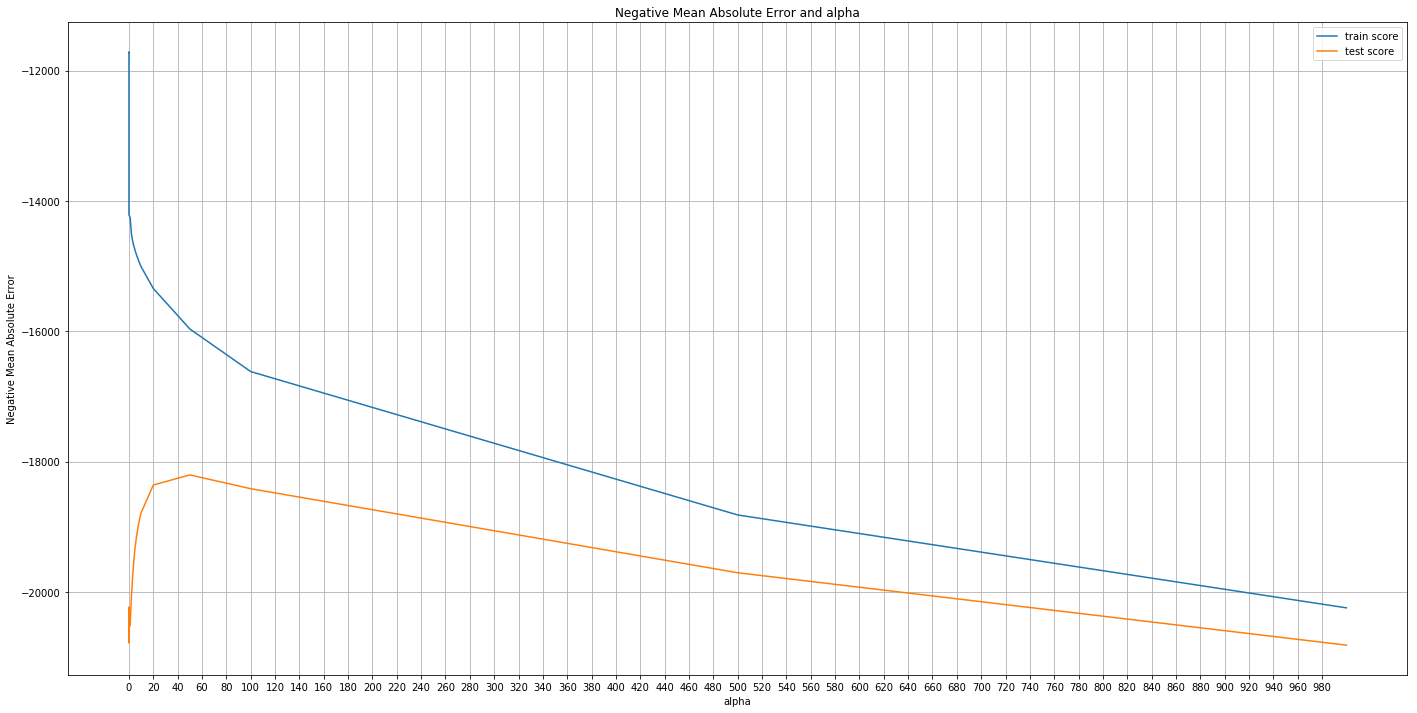

In [69]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(24,12))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xticks(np.arange(0, 1000, step=20))
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

- alpha=50 looks an optimal value from the above graph, fitting Ridge regression with this values

In [70]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

- Predict using Ridge model and checking R2 value

In [71]:
# predict prices of X_train
y_train_pred = ridge.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
print(r2)

0.8692665884582231


In [72]:
# predict prices of X_test
y_pred = ridge.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8695183927310188


- Creating frame of coefficents of Ridge regression

In [73]:
ridge_vars=pd.DataFrame(list(zip(X_train.columns, ridge.coef_[0])), columns=['vars', 'ridge_coef'])

In [74]:
# ridge_vars.sort_values(['coef'], ascending=False)

#### Lasso

- Using GridSearchCV for tunning alpha

In [75]:
lasso = Lasso()

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ] }

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=5)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.7s
[Parallel(n_jobs=5)]: Done 140 out of 140 | elapsed:    8.0s finished
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/arpitjoshi/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

- Results dataframe of GridSearchCV model

In [76]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.308326,0.023346,0.003190,0.000302,0.0001,{'alpha': 0.0001},-19827.758056,-20790.183557,-21685.326280,-22049.108266,-18281.213996,-20526.033447,1360.412652,26,-11670.081067,-11425.189801,-11821.364667,-12082.705098,-11612.075918,-11722.283310,220.388873
1,0.277882,0.025547,0.002363,0.000383,0.001,{'alpha': 0.001},-19827.375882,-20789.074788,-21684.752900,-22055.823646,-18280.644253,-20526.848536,1362.003717,27,-11670.060657,-11425.185812,-11821.347785,-12082.714840,-11612.046071,-11722.271033,220.395569
2,0.282704,0.010102,0.002080,0.000504,0.01,{'alpha': 0.01},-19823.553248,-20777.979244,-21679.460411,-22084.085835,-18276.238341,-20527.573200,1368.917480,28,-11670.045988,-11425.232871,-11821.278593,-12082.831161,-11611.951892,-11722.268101,220.424835
3,0.307822,0.034590,0.002522,0.000552,0.05,{'alpha': 0.05},-19806.613051,-20740.713247,-21659.249028,-22090.551274,-18273.195206,-20513.371461,1368.457653,25,-11670.074555,-11425.747983,-11821.218858,-12083.295061,-11611.817655,-11722.430822,220.444657
4,0.260060,0.020640,0.001795,0.000114,0.1,{'alpha': 0.1},-19785.341567,-20705.899502,-21636.430916,-22102.264879,-18264.329242,-20498.154385,1371.375265,24,-11670.063213,-11426.453722,-11821.662681,-12084.191134,-11611.735272,-11722.821204,220.596935


- Plotting results for alpha and Neg Mean Abs Error

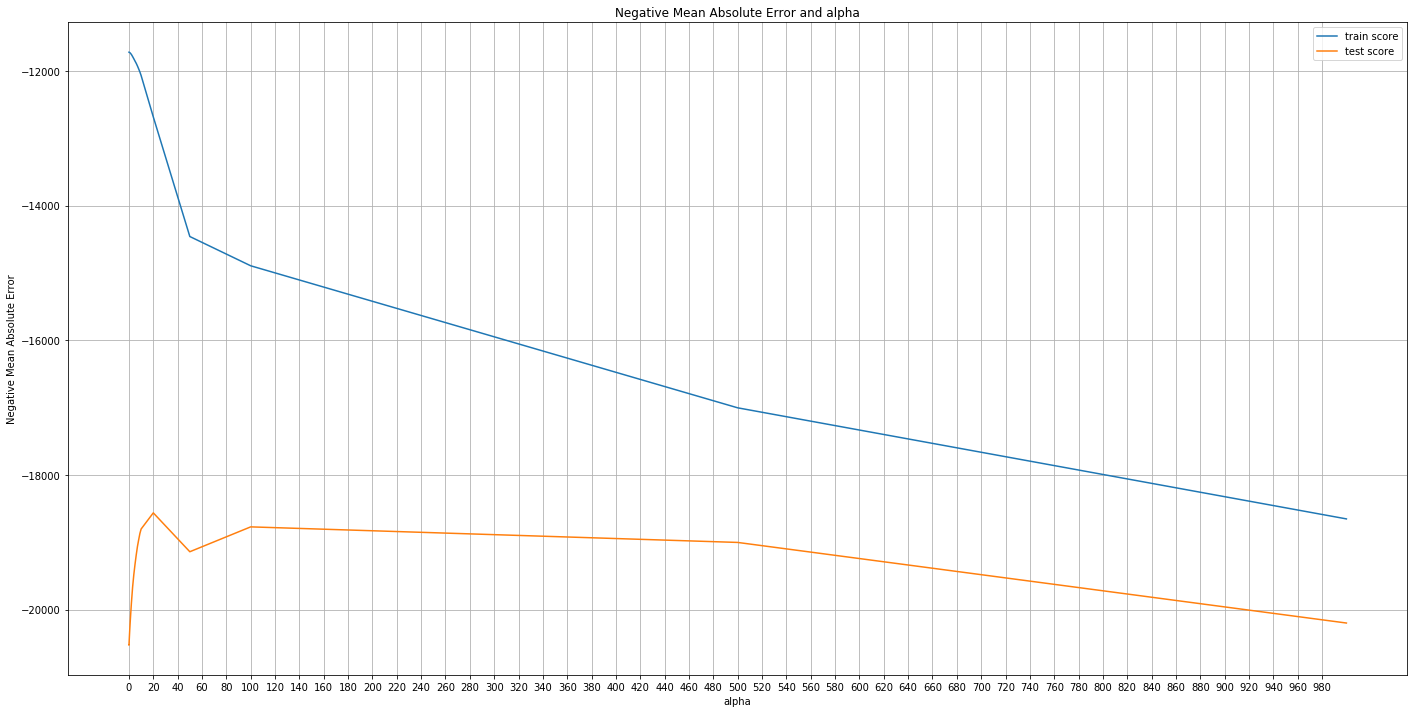

In [77]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(24,12))

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xticks(np.arange(0, 1000, step=20))

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.grid()

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

- alpha=100 looks an optimal value from the above graph, fitting Lasso regression with this values

In [78]:
alpha =100

lasso = Lasso(alpha=alpha)  
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

- Predict using Lasso model and checking R2 value

In [79]:
# predict prices of X_train
y_train_pred = lasso.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_train_pred)
print(r2)

0.9028676983016362


In [80]:
# predict prices of X_test
y_pred = lasso.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.8635140540368581


- Count of non-zero coefficents

In [81]:
np.count_nonzero(lasso.coef_)

123

- Count of coefficents equals 0

In [82]:
len(lasso.coef_) - np.count_nonzero(lasso.coef_)

135

- Creating frame of coefficents of Ridge regression

In [83]:
lasso_vars=pd.DataFrame(list(zip(X_train.columns, lasso.coef_)), columns=['vars', 'lasso_coef'])

In [84]:
# lasso_vars[lasso_vars.coef!=0].sort_values(['coef'], ascending=False)

In [85]:
# lasso_vars[lasso_vars.coef==0].sort_values(['vars'], ascending=False)

In [86]:
coff=pd.merge(ridge_vars, lasso_vars)

In [87]:
coff.sort_values(['lasso_coef', 'ridge_coef'], ascending=False)

,vars,ridge_coef,lasso_coef
116,RoofMatl_WdShngl,6130.231172,6.180566e+04
69,Neighborhood_NoRidge,14669.268755,4.261230e+04
70,Neighborhood_NridgHt,12166.295514,2.786389e+04
15,GrLivArea,11328.130825,2.254870e+04
60,Neighborhood_Crawfor,7774.585767,2.189627e+04
75,Neighborhood_Somerst,5187.065337,2.017691e+04
169,BsmtExposure_Gd,10996.587873,1.923318e+04
76,Neighborhood_StoneBr,3280.632451,1.685262e+04
119,Exterior1st_BrkFace,5855.901634,1.593192e+04
4,OverallQual,16821.299461,1.422715e+04


- Plotting coefficient magnitudes

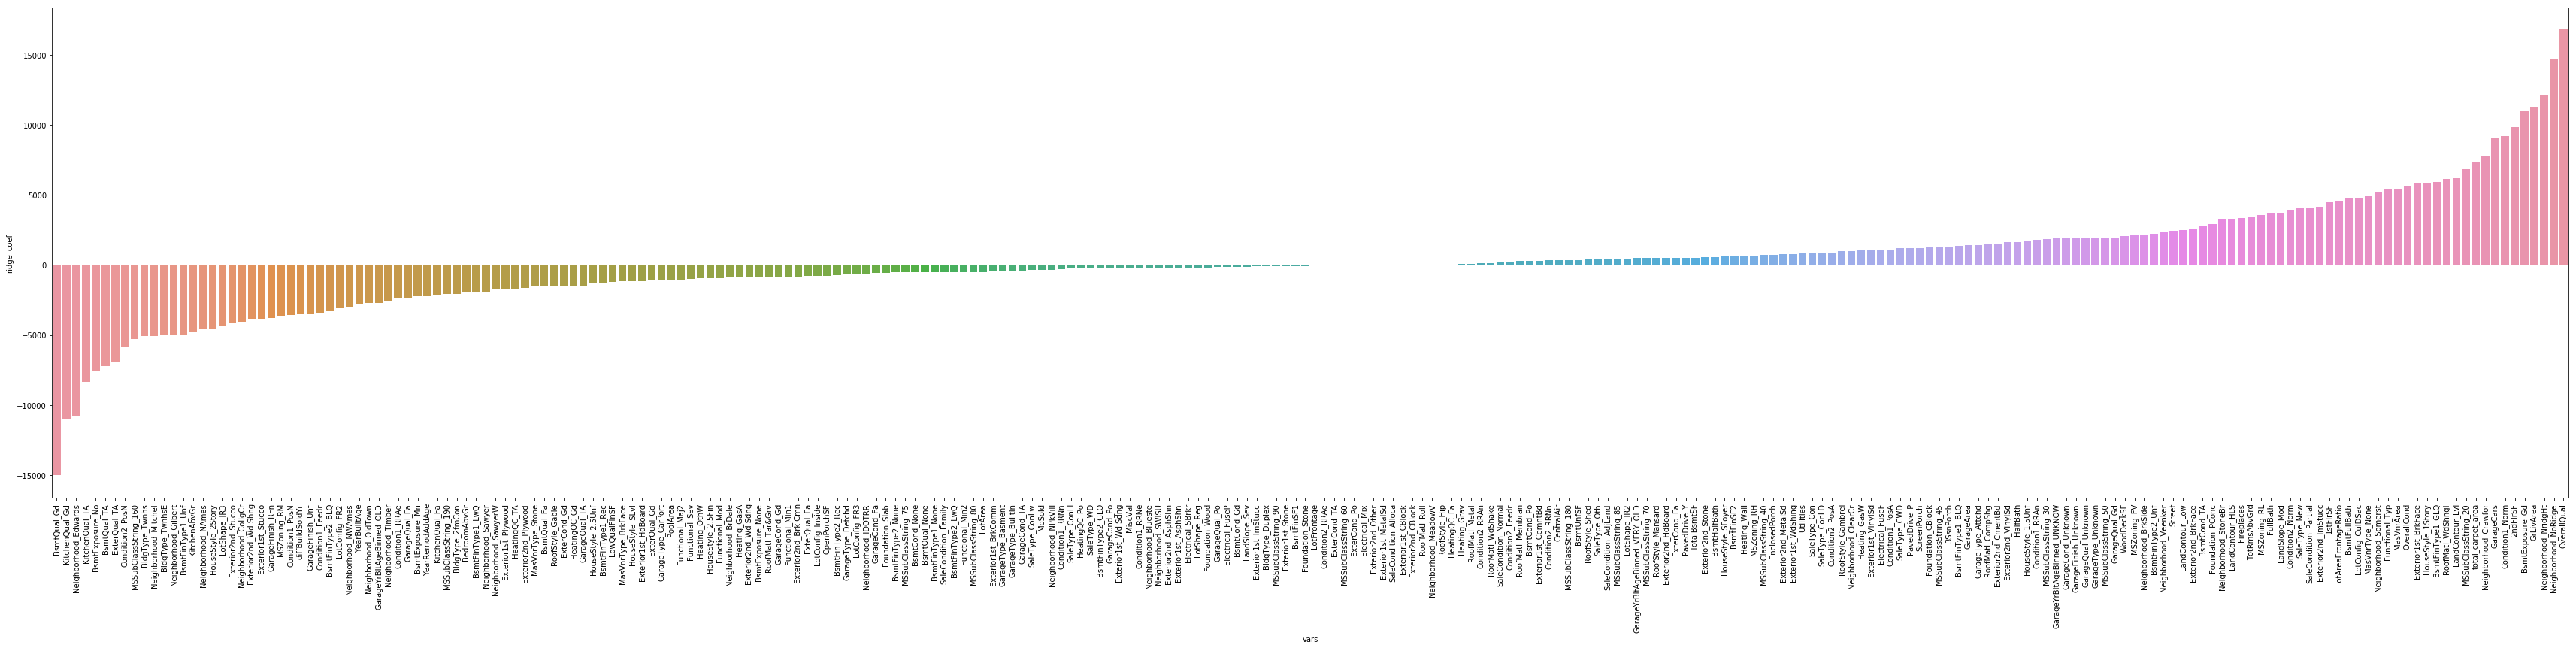

In [88]:
sorted_ridge=coff.sort_values('ridge_coef')
plt.figure(figsize=(60,12))
sns.barplot(y=sorted_ridge.ridge_coef, x=sorted_ridge.vars)
plt.xticks(rotation=90)
plt.show()

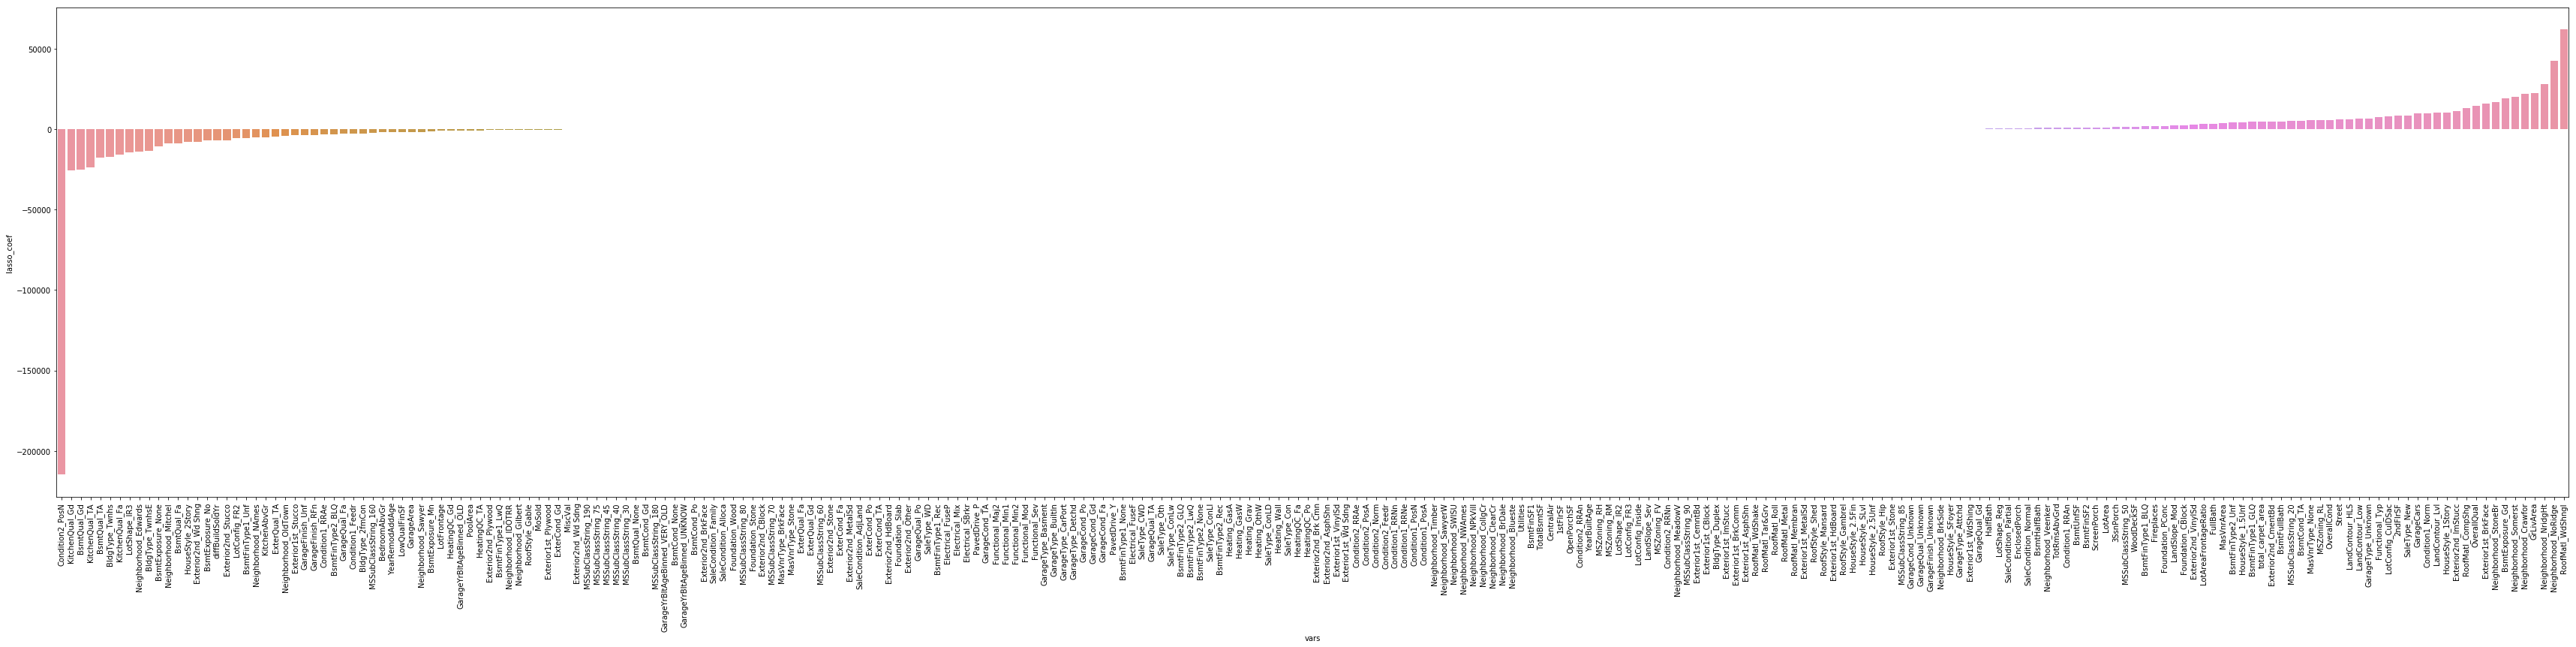

In [89]:
sorted_lasso=coff.sort_values('lasso_coef')
plt.figure(figsize=(60,12))
sns.barplot(y=sorted_lasso.lasso_coef, x=sorted_lasso.vars)
plt.xticks(rotation=90)
plt.show()

Coffiecients values for lasso is equal to 0 for insignifant variables. 

Coffiecients values for ridge is also small for insignifant variables

# Solutions

### Significant Variables

#### Looking at both Ridge & Lasso coffients we can say some top significant variables are

- RoofMatl
- Neighborhood
- GrLivArea
- BsmtExposure
- Exterior1st
- OverallQual
- Exterior2nd
- HouseStyle
- LandContour
- Condition1
- GarageCars
- SaleType

`Some positive impacting variables`
- RoofMatl_WdShngl
- Neighborhood_NoRidge
- Neighborhood_NridgHt
- GrLivArea
- Neighborhood_Crawfor
- Neighborhood_Somerst
- BsmtExposure_Gd
- Neighborhood_StoneBr
- Exterior1st_BrkFace
- OverallQual
- RoofMatl_CompShg
- Exterior2nd_ImStucc
- HouseStyle_1Story
- LandContour_Lvl
- Condition1_Norm
- GarageCars
- SaleType_New


`Some negative impacting variables`
- diffBuildSoldYr
- BsmtExposure_No
- Exterior2nd_Wd Shng
- HouseStyle_2Story
- BsmtQual_Fa
- Neighborhood_Mitchel
- BsmtExposure_None
- BldgType_TwnhsE
- Neighborhood_Edwards
- LotShape_IR3
- KitchenQual_Fa
- BldgType_Twnhs
- BsmtQual_TA
- KitchenQual_TA
- BsmtQual_Gd
- KitchenQual_Gd
- Condition2_PosN


### Significant variables describing the price of house

The variables with has zero cofficients for lasso and very less value of cofficients for rigde DO NOT bear impact on the pricing

Whereas cofficients with high absolute values(both positive/negative) have impact on pricing 

### Optimal value of lambda for ridge and lasso regression

- Ridge Regression 

alpha=50 || Train-R2~=0.8692 || Test-R2~=0.8695

- Lasso Regression

alpha=100 || Train-R2~=0.9028 || Test-R2~=0.8635